In [1]:
from lstm import cnn_lstm_

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
batch_size = 64
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
train_dataset = datasets.FashionMNIST(root='../data_mnist', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='../data_mnist', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
model = cnn_lstm_().to(device)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Ewaluacja na zbiorze testowym
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_loss /= len(test_loader)
    test_acc = correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")


Epoch 1/10 | Train Loss: 0.7728 | Train Acc: 0.7170 | Test Loss: 0.5619 | Test Acc: 0.7892
Epoch 2/10 | Train Loss: 0.4876 | Train Acc: 0.8189 | Test Loss: 0.4435 | Test Acc: 0.8373
Epoch 3/10 | Train Loss: 0.4061 | Train Acc: 0.8504 | Test Loss: 0.3731 | Test Acc: 0.8664
Epoch 4/10 | Train Loss: 0.3618 | Train Acc: 0.8685 | Test Loss: 0.3854 | Test Acc: 0.8585
Epoch 5/10 | Train Loss: 0.3300 | Train Acc: 0.8789 | Test Loss: 0.3548 | Test Acc: 0.8716
Epoch 6/10 | Train Loss: 0.3068 | Train Acc: 0.8873 | Test Loss: 0.3120 | Test Acc: 0.8870
Epoch 7/10 | Train Loss: 0.2940 | Train Acc: 0.8921 | Test Loss: 0.3198 | Test Acc: 0.8840
Epoch 8/10 | Train Loss: 0.2802 | Train Acc: 0.8974 | Test Loss: 0.3108 | Test Acc: 0.8853
Epoch 9/10 | Train Loss: 0.2709 | Train Acc: 0.9011 | Test Loss: 0.2868 | Test Acc: 0.8963
Epoch 10/10 | Train Loss: 0.2594 | Train Acc: 0.9055 | Test Loss: 0.2754 | Test Acc: 0.8991


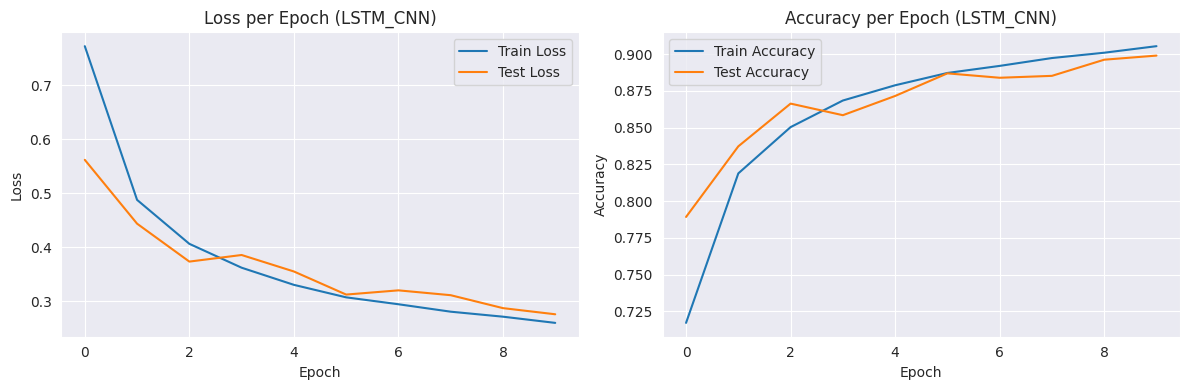

In [9]:
# Tworzymy dwa wykresy obok siebie
plt.figure(figsize=(12, 4))

# LOSS
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title("Loss per Epoch (LSTM_CNN)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# ACCURACY
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title("Accuracy per Epoch (LSTM_CNN)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
from datetime import datetime

now = datetime.now()
timestamp = now.strftime("%Y-%m-%d_%H:%M:%S")

In [11]:
from pathlib import Path
name = "CNN_lstm_"+timestamp+".pth"
path_1 = "./weights/"
path_2 = path_1 + name
Path(path_1).mkdir(parents=True, exist_ok=True)
torch.save(model.state_dict(), path_2)

In [12]:
path = "./results/CNN_lstm_"+timestamp
Path(path).mkdir(parents=True, exist_ok=True)

In [13]:
history = {
    'loss': train_losses,
    'val_loss': test_losses,
    'train_acc': train_accuracies,
    'val_acc': test_accuracies
}

In [14]:
import pickle

with open(path + "/history.pickle", 'wb') as f:
    pickle.dump(history, f)